**VIDEO GAME SALES ANALYSIS: UNVEILING MARKET TRENDS AND OPPORTUNITIES**

This notebook performs data analysis on a dataset containing video game sales. Through various visualizations such as bar chart, scatterplot and heatmap, we aim to uncover patterns, relationships and distributions in the data.

By combining insightful visualizations, and data-driven storytelling, the stakeholders can have a thorough picture of the video game market and help them to make wise decisions in this dynamic environment.

**LOADING THE DATASET**

We start by loading the dataset to examine its structure and the types of data available for data analysis.

In [34]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [35]:
# Load Dataset
data = pd.read_csv('vgsales.csv')
data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [36]:
data.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


**DATA CLEANING AND PREPARATION**

Rows with missing values are dropped and columns with main numericals of the data is extracted.

In [38]:
# Data Cleaning and Preparation
data.dropna(inplace=True) # Drop rows with missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [39]:
# Extract relevant columns
sales_data = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']] #Main numericals of the data for basic statistics
genres = data['Genre']
years_and_sales = data[['Year', 'Global_Sales']]

**STATISTICAL DEPTH ANALYSIS**

A summary of the entire range, dispersion, and central tendency of numerical features is given by statistical depth. This analysis facilitates rapid comprehension of the data's overall characteristics and the detection of any noteworthy abnormalities or outliers.

In [40]:
# ------ Statistical Depth Metrics ------
# Statistical analysis of the sales_data
sales_data.describe()

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000
mean,0.265647,0.147731,0.078833,0.540910
std,0.822432,0.509303,0.311879,1.567345
min,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.170000
75%,0.240000,0.110000,0.040000,0.480000
max,41.490000,29.020000,10.220000,82.740000


In [41]:
# Mean of the sales_data
sales_data.mean()

,0
NA_Sales,0.265647
EU_Sales,0.147731
JP_Sales,0.078833
Global_Sales,0.540910


In [42]:
# Median of the sales_data
sales_data.median()

,0
NA_Sales,0.08
EU_Sales,0.02
JP_Sales,0.00
Global_Sales,0.17


In [43]:
# Standard deviation of the sales_data
sales_data.std()

,0
NA_Sales,0.822432
EU_Sales,0.509303
JP_Sales,0.311879
Global_Sales,1.567345


In [44]:
# Skewness of the sales_data
sales_data.skew()

,0
NA_Sales,18.740913
EU_Sales,18.774796
JP_Sales,11.124214
Global_Sales,17.304312


In [45]:
# Kurtosis of the sales_data
sales_data.kurtosis()

,0
NA_Sales,642.909262
EU_Sales,746.431300
JP_Sales,191.209577
Global_Sales,596.004589


**DATA VISUALIZATIONS**

Various data visualizations are done to analyse the data and to achieve insights from it.

**BAR CHART**

The distribution of genres in the bar chart tells a fascinating story of customer preferences. It can help to understand the genre distribution in video games. And also shows which genre are customer favourites.

In [46]:
# 1. Bar Chart: Genre Distribution
def plot_vgsales_bar(data):
    '''
    plots a bar chart to show the distribution of video game genres
    '''
    plt.figure(figsize=(8, 6))
    genres.value_counts().plot(kind='bar', color='blue')
    plt.title('Video Game Genre Distribution', fontsize=15)
    plt.xlabel('Genre', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.savefig('bar_plot_genres.png')
    plt.show()

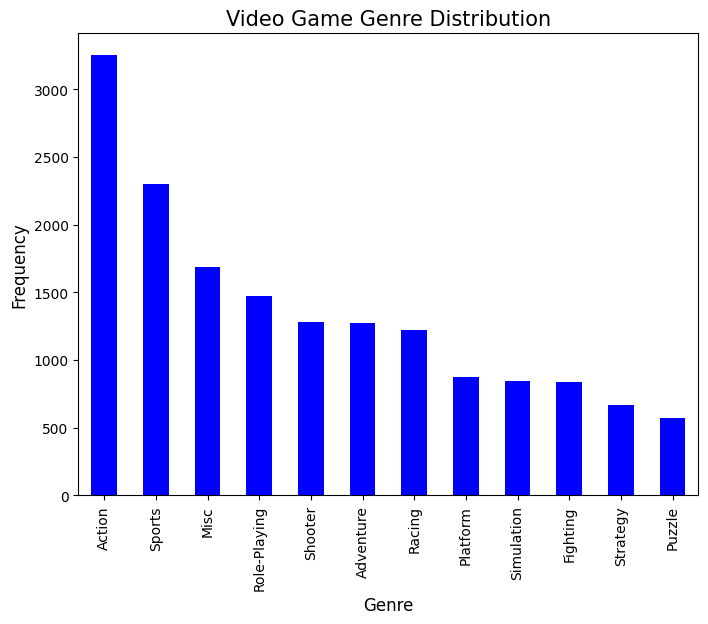

In [47]:
plot_vgsales_bar(data)

**SCATTER PLOT**

The scatter plot shows the relationship between year and global sales. By examining this relationship, we can understand how different generations have influenced the video game sales.

In [48]:
# 2. Scatter Plot: Year vs Global Sales
def plot_vgsales_scatter(data):
    '''
    plots a scatter plot to show the relationship between year and global sales trends
    '''
    plt.figure(figsize=(8, 6))
    plt.scatter(years_and_sales['Year'], years_and_sales['Global_Sales'], alpha=0.6, color='blue')
    plt.title('Scatter Plot of Year vs Global Sales', fontsize=15)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Global Sales (Millions)', fontsize=12)
    plt.savefig('scatter_plot_year_vs_sales.png')
    plt.show()

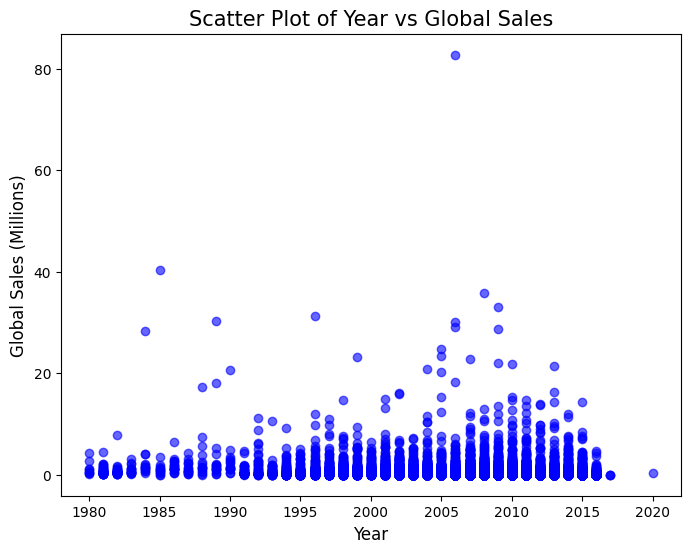

In [49]:
plot_vgsales_scatter(data)

**CORRELATION HEATMAP**

The correlation heatmap reveals relationships between numerical features, helping us identify pairs of variables that change together. Strong correlations might suggest that as one variable increases, the other tends to follow.

In [50]:
#3. Correlation heatmap for sales data
def plot_correlation_heatmap(data):
    """
    Creates and displays a correlation matrix heatmap.

    Args:
        data (pd.DataFrame): The input DataFrame containing the data.
    """
    plt.figure(figsize=(10, 8))  # Adjust figure size as needed
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Heatmap', fontsize=15)
    plt.savefig('correlation_heatmap.png')
    plt.show

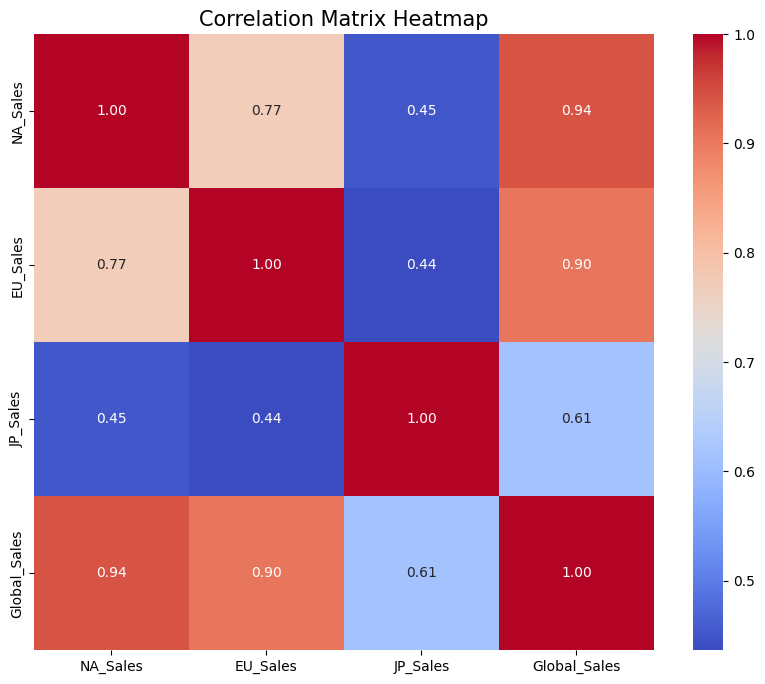

In [51]:
plot_correlation_heatmap(sales_data)

**K-MEANS CLUSTERING**

K-means clustering is used to have a better understanding of market segmentation.

In [52]:
# ------ K-Means Clustering ------
def perform_kmeans_clustering(data, n_clusters=3, random_state=42):
    """
    Performs KMeans clustering on the provided data.

    Args:
        data (pd.DataFrame or np.ndarray): The input data for clustering.
        n_clusters (int, optional): The number of clusters to form. Defaults to 3.
        random_state (int, optional): Seed for random number generator. Defaults to 42.

    Returns:
        np.ndarray: An array containing the cluster assignments for each data point.
    """

    # Scale the data (important for KMeans)
    scaler = StandardScaler()
    scaled_sales = scaler.fit_transform(sales_data)

    # Create and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(sales_data)

    return cluster_labels

An elbow plot is plotted to find optimal number of clusters which will represent different segments of the market.

In [53]:
# Elbow Plot to find optimal number of clusters
inertia = []
k_values = range(2, 11)

# Scale the data (important for KMeans)
scaler = StandardScaler()
scaled_sales = scaler.fit_transform(sales_data)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_sales)
    inertia.append(kmeans.inertia_)

In [54]:
# 4. Elbow Plot for Optimal Clusters
def plot_vgsales_elbow(data):
    '''
    plots an elbow plot to find the optimal number of clusters for K-means clustering
    '''
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, inertia, marker='o', label='Inertia')
    plt.title('Elbow Plot for Optimal Clusters', fontsize=15)
    plt.xlabel('Number of Clusters', fontsize=12)
    plt.ylabel('Inertia', fontsize=12)
    plt.legend()
    plt.savefig('elbow_plot.png')
    plt.show()

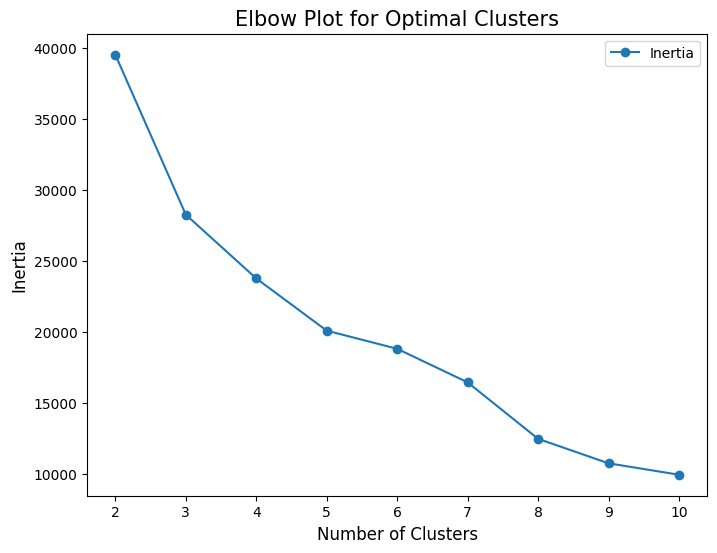

In [55]:
plot_vgsales_elbow(data)

Three ideal clusters were found from elbow plot. These clusters were assigned to the video games in the data.

In [56]:
# Apply K-Means Clustering (e.g., with 3 clusters chosen based on Elbow Plot)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_sales)

In [57]:
# Add clusters to sales_data for interpretation
sales_data['Cluster'] = clusters

<ipython-input-57-7b8f29f78abd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Cluster'] = clusters


The clusters are visualized as a heatmap

In [58]:
# Heatmap: Cluster Sales Patterns (Visualization of Average Regional Sales)
def plot_vgsales_heatmap(data):
    '''
    Generates a heatmap to visualize the average sales figures for each cluster across different regions.
    '''
    cluster_means = sales_data.groupby('Cluster')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']].mean()
    cluster_means = cluster_means.reset_index()
    plt.figure(figsize=(10, 6))
    sns.heatmap(cluster_means.set_index('Cluster'), annot=True, cmap='viridis', fmt=".2f")
    plt.title('Cluster Heatmap - Average Sales by Region')
    plt.xlabel('Region')
    plt.ylabel('Cluster')
    plt.show()

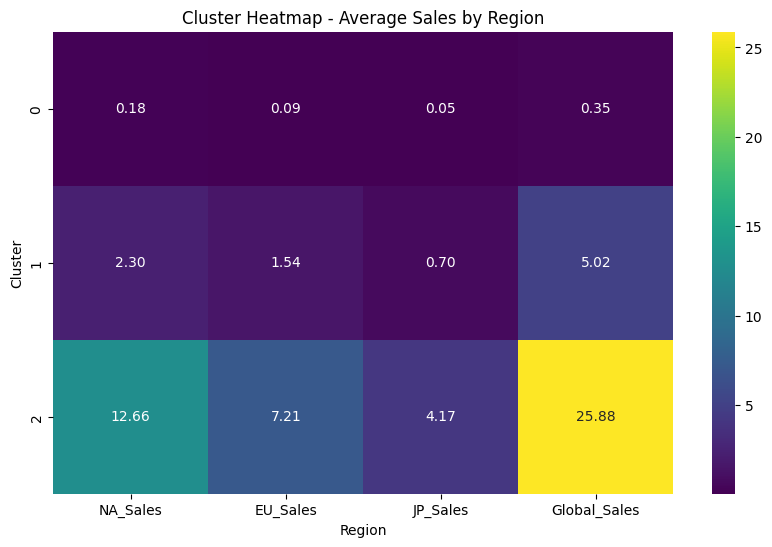

In [59]:
plot_vgsales_heatmap(data)

**LINE FITTING**

Linear regression is used to forecast future trends in the action game genre.

In [60]:
# ------ Linear Regression (Line Fitting) ------
# Filter Action genre data for trend analysis
action_data = data[data['Genre'] == 'Action']

In [61]:
# Calculate average global sales per year for Action games
action_trend = action_data.groupby('Year')['Global_Sales'].mean().reset_index()

In [62]:
# Perform Linear Regression
X = action_trend[['Year']]
y = action_trend['Global_Sales']
reg_model = LinearRegression()
reg_model.fit(X, y)
predictions = reg_model.predict(X)

In [63]:
def plot_regression_fit(X, y, predictions):
    """
    Plots a scatter plot of the actual data and a line plot of the regression predictions.

    This function visualizes the relationship between the independent variable (X) and
    the dependent variable (y) using a scatter plot, and overlays a line plot
    representing the linear regression fit (predictions).

    Args:
        X (array-like): The independent variable data (e.g., years).
        y (array-like): The dependent variable data (e.g., sales).
        predictions (array-like): The predicted values from the regression model.

    Returns:
        None
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
    plt.plot(X, predictions, color='red', label='Best Fit Line')
    plt.title('Action Games: Global Sales Over Time (Trend)', fontsize=15)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Global Sales (Millions)', fontsize=12)
    plt.legend()
    plt.savefig('line_fit_action_sales.png')

In [64]:
# Plot Regression Fit
def plot_regression_fit(X, y, predictions):
    '''
    plots a line fit to show the trend of global sales over time
    '''
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', alpha=0.6, label='Actual Data')
    plt.plot(X, predictions, color='red', label='Best Fit Line')
    plt.title('Action Games: Global Sales Over Time (Trend)', fontsize=15)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Average Global Sales (Millions)', fontsize=12)
    plt.legend()
    plt.savefig('line_fit_action_sales.png')

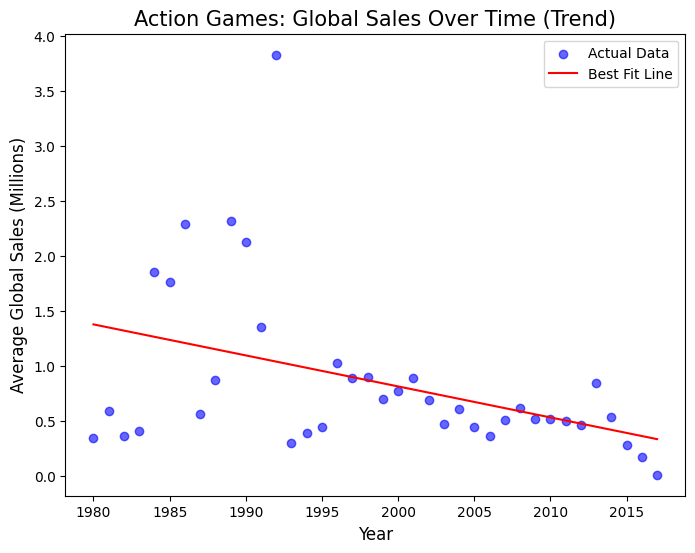

In [65]:
plot_regression_fit(X, y, predictions)
